<a href="https://colab.research.google.com/github/giuliovv/bldc_project_work/blob/master/modello_data_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import base64
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
def get_values_from_github(url_x, url_y):
  X_read = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/" + url_x + ".csv").text
  Y_read = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/" + url_y + ".csv").text

  # Last value is empty
  X = X_read.split("\n")[:-1]
  Y = Y_read.split("\n")[:-1]

  array = np.array([X, Y]).astype("float")

  df = pd.DataFrame(array.T, columns=["X", "Y"])
  
  return df

In [55]:
df = get_values_from_github("input", "output")
df.head()

,X,Y
0,0.000000e+00,0.000000
1,1.633300e-20,0.000022
2,8.166700e-20,0.000066
3,1.388300e-18,0.000288
4,3.242200e-17,0.001395


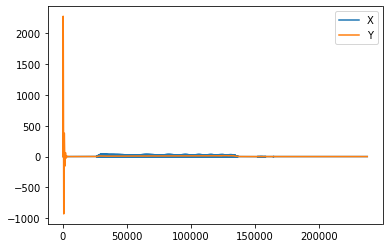

In [56]:
df.plot()

Una prima situazione interessante:

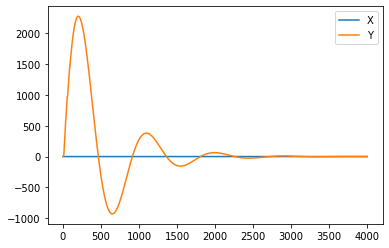

In [57]:
df.iloc[:int(4e3)].plot()

Taglio il primo salto a vuoto:

In [58]:
def cut_df(df, length):
  return df.iloc[int(length):]

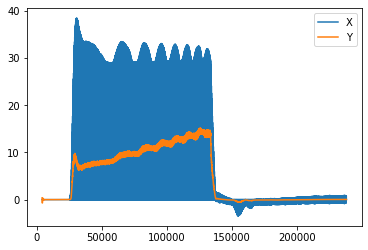

In [59]:
df_cut = cut_df(df, 4e3)
df_cut.plot()

Pulizia disturbi:

In [60]:
def clean_disturbances(df, roll_value):
  return pd.concat([df.X.rolling(roll_value).max(), df.Y.rolling(roll_value).max()], axis=1)

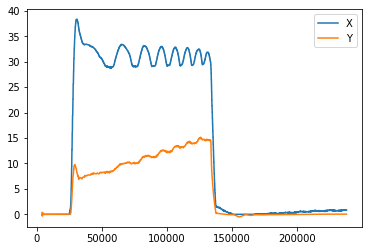

In [61]:
df_cleaned = clean_disturbances(df_cut, 300)
df_cleaned.plot()

In [62]:
def pipeline(df):
  cutted = cut_df(df, 4e3)
  cleaned = clean_disturbances(cutted, 300)
  df_nona = cleaned.dropna()
  X_np = df_nona.X.values.reshape(-1, 1)
  Y_np = df_nona.Y.values
  return X_np, Y_np

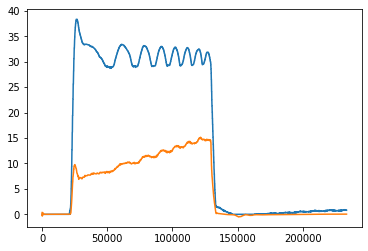

In [63]:
x_plt, y_plt = pipeline(df)
plt.plot(x_plt.reshape(-1))
plt.plot(y_plt)

## Prova 1: Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [65]:
X, y = pipeline(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [66]:
reg = LinearRegression().fit(X_train, y_train)

In [67]:
reg.score(X_test, y_test)

0.9016510011361183

In [68]:
reg.coef_

array([0.34813449])

In [69]:
previsione = reg.predict(X)

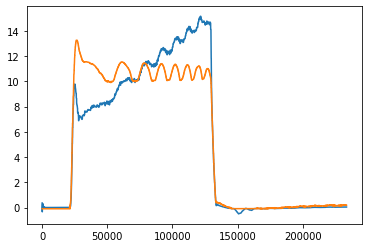

In [70]:
plt.plot(y)
plt.plot(previsione)

Test 

In [71]:
df_test = get_values_from_github("input_test", "output_test")
X, y = pipeline(df_test)

In [72]:
reg.score(X, y)

0.8151081652044208